In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [5]:
Advertising = pd.read_csv("../ISLP_labs/Advertising.csv", index_col=0)
Advertising.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


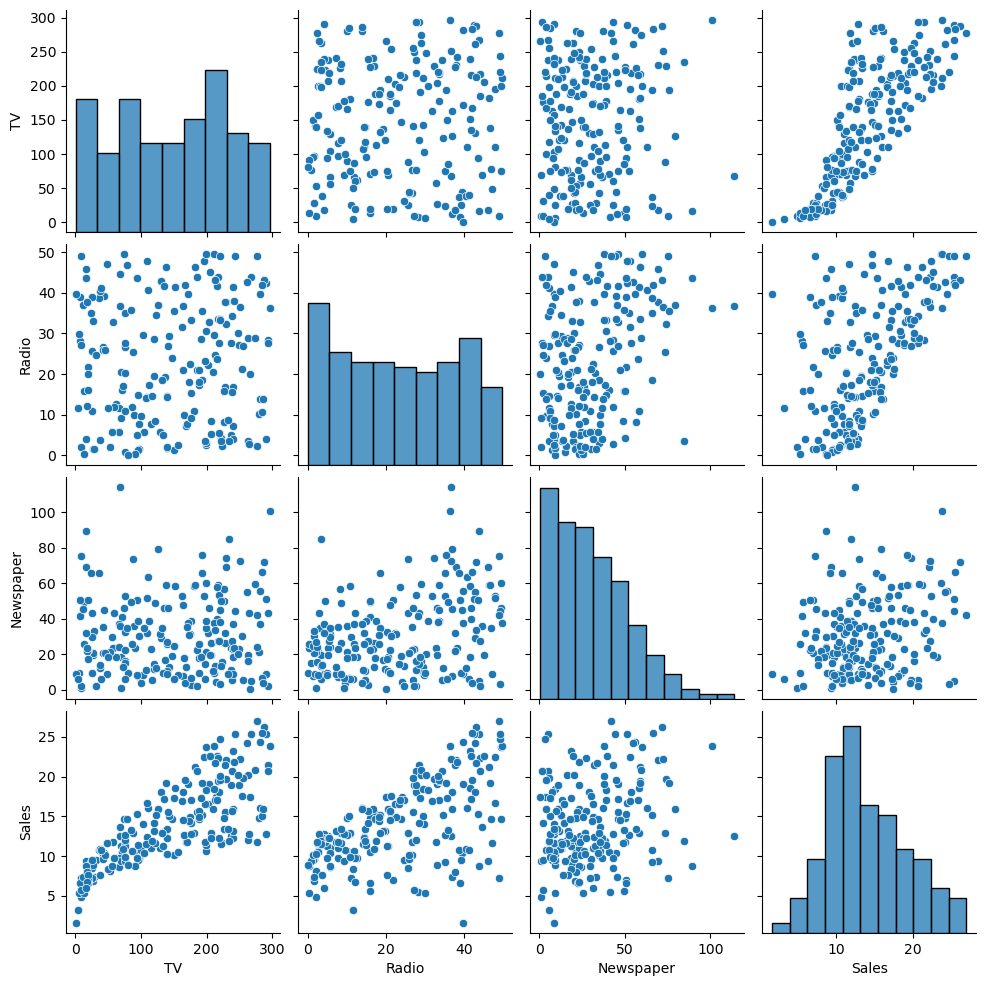

In [7]:
sns.pairplot(Advertising)

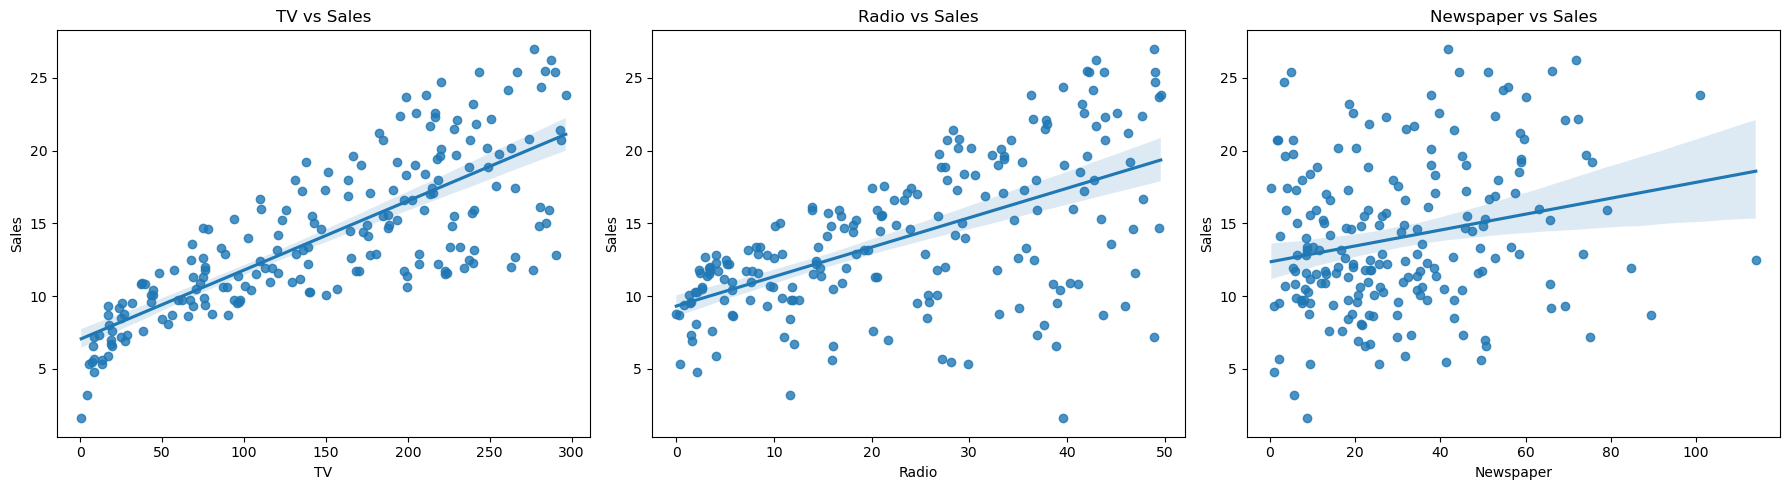

In [8]:
# Subplots erstellen
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatterplot mit Regressionsgerade für Input1 vs Sales
sns.regplot(x='TV', y='Sales', data=Advertising, ax=axes[0])
axes[0].set_title('TV vs Sales')

# Scatterplot mit Regressionsgerade für Input2 vs Sales
sns.regplot(x='Radio', y='Sales', data=Advertising, ax=axes[1])
axes[1].set_title('Radio vs Sales')

# Scatterplot mit Regressionsgerade für Input3 vs Sales
sns.regplot(x='Newspaper', y='Sales', data=Advertising, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

# Layout anpassen
plt.tight_layout()

# Diagramm anzeigen
plt.show()

In [9]:
301/5634634

5.3419618736549705e-05

In [10]:
# Split in Input- und Outputvariable
X = Advertising[['TV']]
y = Advertising['Sales']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficient for TV: {lr_model.coef_[0]}")

mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

Intercept: 6.812240980236229
Coefficient for TV: 0.04817437655419803
Test Mean Squared Error: 9.822261593633964


/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


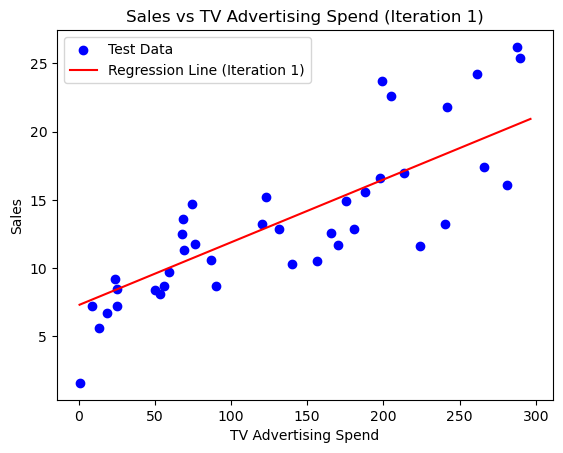

/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


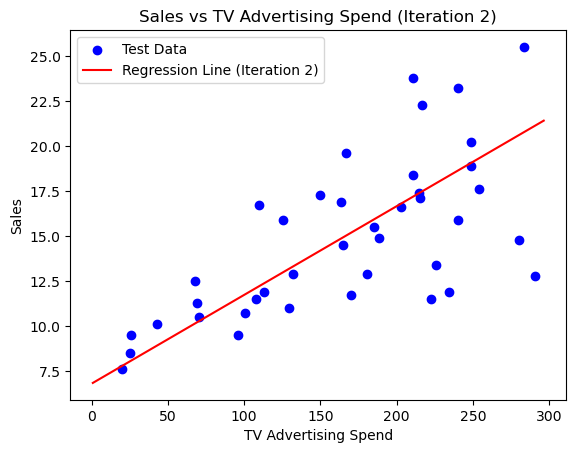

/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


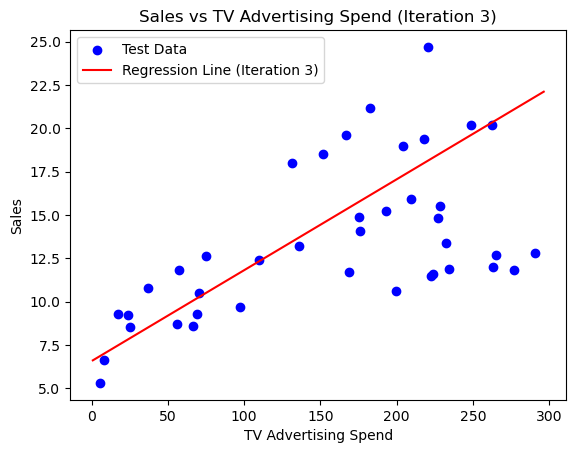

/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


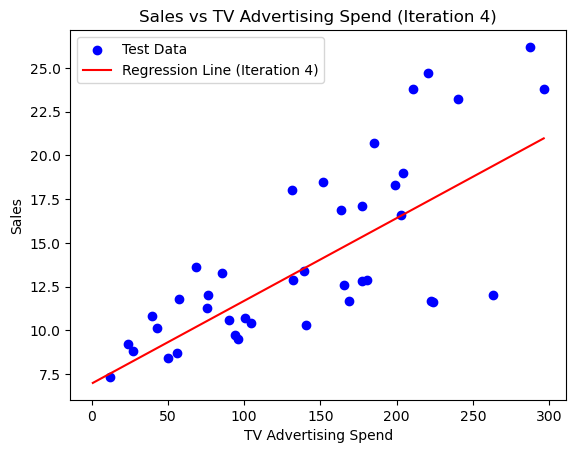

/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


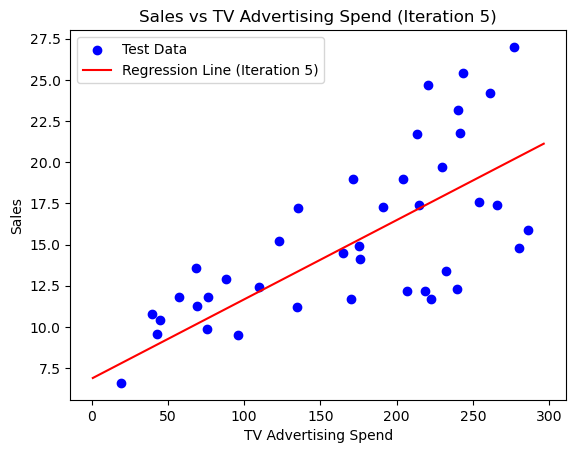

Coefficients from each split:
[0.046007789603017143, 0.049275095667046014, 0.05245828085802825, 0.047292542547485876, 0.04810780532858885]
Intercept from each split:
[7.292493773559366, 6.799773449796857, 6.566524608650459, 6.95425119624202, 6.865601946946061]
Train MSE of each split
[10.617238416139852, 10.454336617171425, 8.99761678931429, 10.310414011789058, 9.886852832059859]
Test MSE of each split
[10.186181934530222, 10.859345325608267, 17.792893505799917, 11.389041805489907, 13.062266288305668]


In [13]:
# Store the coefficients in a list
coefficients = []
intercept = []
mse_train = []
mse_test = []

# Loop through 5 different train-test splits
for i in range(5):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Get the coefficient and store it
    coefficients.append(model.coef_[0])
    intercept.append(model.intercept_)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_test.append(mean_squared_error(y_test, y_pred))
    mse_train.append(mean_squared_error(y_train, y_pred_train))

    # Plot the scatter of the actual points (TV vs Sales)
    plt.scatter(X_test, y_test, color='blue', label='Test Data')

    # Get the regression line: predict across the range of X values
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range_pred = model.predict(X_range)

    # Plot the regression line
    plt.plot(X_range, y_range_pred, color='red', label=f'Regression Line (Iteration {i+1})')

    # Add labels and title
    plt.xlabel('TV Advertising Spend')
    plt.ylabel('Sales')
    plt.title(f'Sales vs TV Advertising Spend (Iteration {i+1})')

    # Show the legend and plot
    plt.legend()
    plt.show()

# Print out the list of coefficients
print("Coefficients from each split:")
print(coefficients)
print("Intercept from each split:")
print(intercept)
print("Train MSE of each split")
print(mse_train)
print("Test MSE of each split")
print(mse_test)

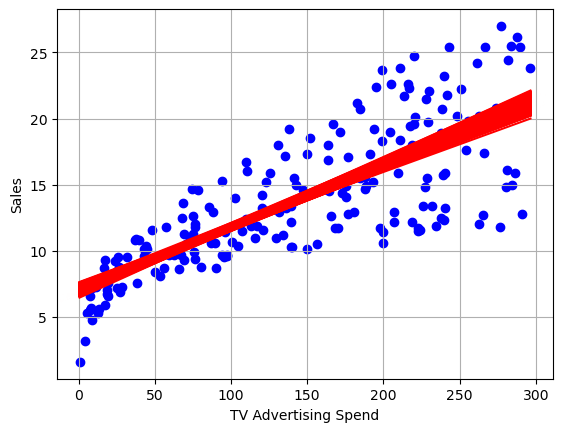

In [29]:
# Store the coefficients in a list
coefficients = []
intercept = []
mse_train = []
mse_test = []

# Plot the scatter of the actual points (TV vs Sales)
plt.scatter(X, y, color='blue')

# Loop through 5 different train-test splits
for i in range(2000):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Get the coefficient and store it
    coefficients.append(model.coef_[0])
    intercept.append(model.intercept_)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_test.append(mean_squared_error(y_test, y_pred))
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    

    # Get the regression line: predict across the range of X values
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    #y_range_pred = model.predict(X_range)
    y_range_pred = model.intercept_+X_range*model.coef_[0]

    # Plot the regression line
    plt.plot(X_range, y_range_pred, color='red')

# Add labels and title
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')

plt.grid()
plt.show() 




In [47]:
# Mittelwerte für Koeffizienten, Intercept, Trainings- und Test-MSE
# print("Coefficients from each split:")
# print(np.mean(coefficients))
# print("Intercept from each split:")
# print(intercept)
# print("Train MSE of each split")
# print(mse_train)
# print("Test MSE of each split")
# print(mse_test)

# Überblick über den Koeffizienten
print('----------------------------------------')
print('Koeffizient a_1')
print('----------------------------------------')
print('Mittelwert: ',np.mean(coefficients))
print('Standardabweichung: ',np.std(coefficients))
print('Minimum: ',np.min(coefficients))
print('Maximum: ',np.max(coefficients))

# Überblick über den Intercept
print('\n----------------------------------------')
print('Intercept a_0')
print('----------------------------------------')
print('Mittelwert: ',np.mean(intercept))
print('Standardabweichung: ',np.std(intercept))
print('Minimum Intercept: ',np.min(intercept))
print('Maximum Intercept: ',np.max(intercept))



----------------------------------------
Koeffizient a_1
----------------------------------------
Mittelwert:  0.047475843124274164
Standardabweichung:  0.0014456360204647169
Minimum:  0.041891198211023904
Maximum:  0.05245828085802825

----------------------------------------
Intercept a_0
----------------------------------------
Mittelwert:  7.039986488388118
Standardabweichung:  0.1706803470577574
Minimum Intercept:  6.426968179141923
Maximum Intercept:  7.615696386215914


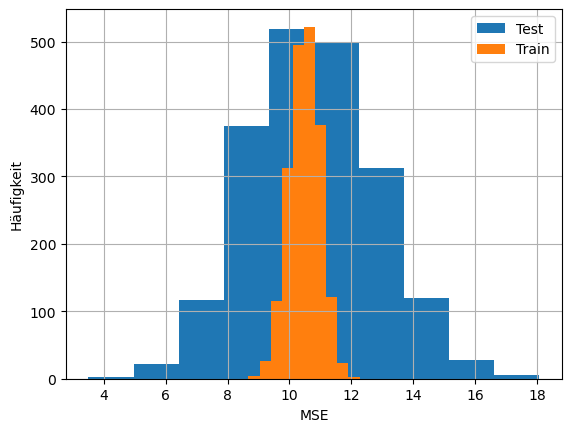

In [38]:
plt.hist(mse_test, label='Test')
plt.hist(mse_train, label='Train')
plt.grid()
plt.xlabel('MSE')
plt.ylabel('Häufigkeit')
plt.legend()


Text(0, 0.5, 'Häufigkeit')

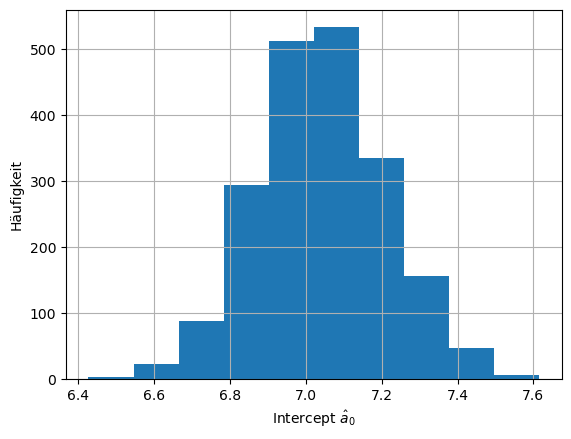

In [48]:
#plt.bar(X_range, y_range_pred, color='red')
plt.hist(intercept)
plt.grid()
plt.xlabel('Intercept $\hat{a}_0$')
plt.ylabel('Häufigkeit')

Text(0, 0.5, 'Häufigkeit')

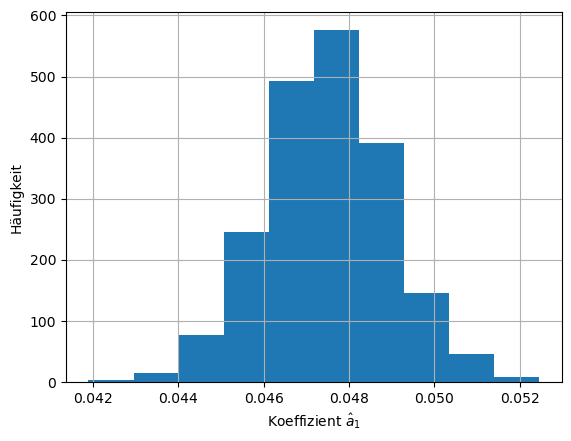

In [49]:
plt.hist(coefficients)
plt.grid()
plt.xlabel('Koeffizient $\hat{a}_1$')
plt.ylabel('Häufigkeit')

Intercept: 12.31054833403927
Coefficient for Newspaper: 0.059756697880265636
Test Mean Squared Error: 30.620733995242563


/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


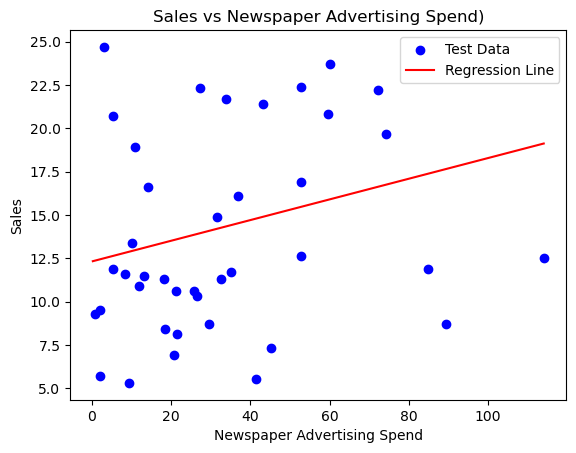

In [56]:
# Split in Input- und Outputvariable
X = Advertising[['Newspaper']]
y = Advertising['Sales']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficient for Newspaper: {lr_model.coef_[0]}")

mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

# Plot the scatter of the actual points (TV vs Sales)
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Get the regression line: predict across the range of X values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = lr_model.predict(X_range)

# Plot the regression line
plt.plot(X_range, y_range_pred, color='red', label=f'Regression Line')

# Add labels and title
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.title(f'Sales vs Newspaper Advertising Spend)')

# Show the legend and plot
plt.legend()
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


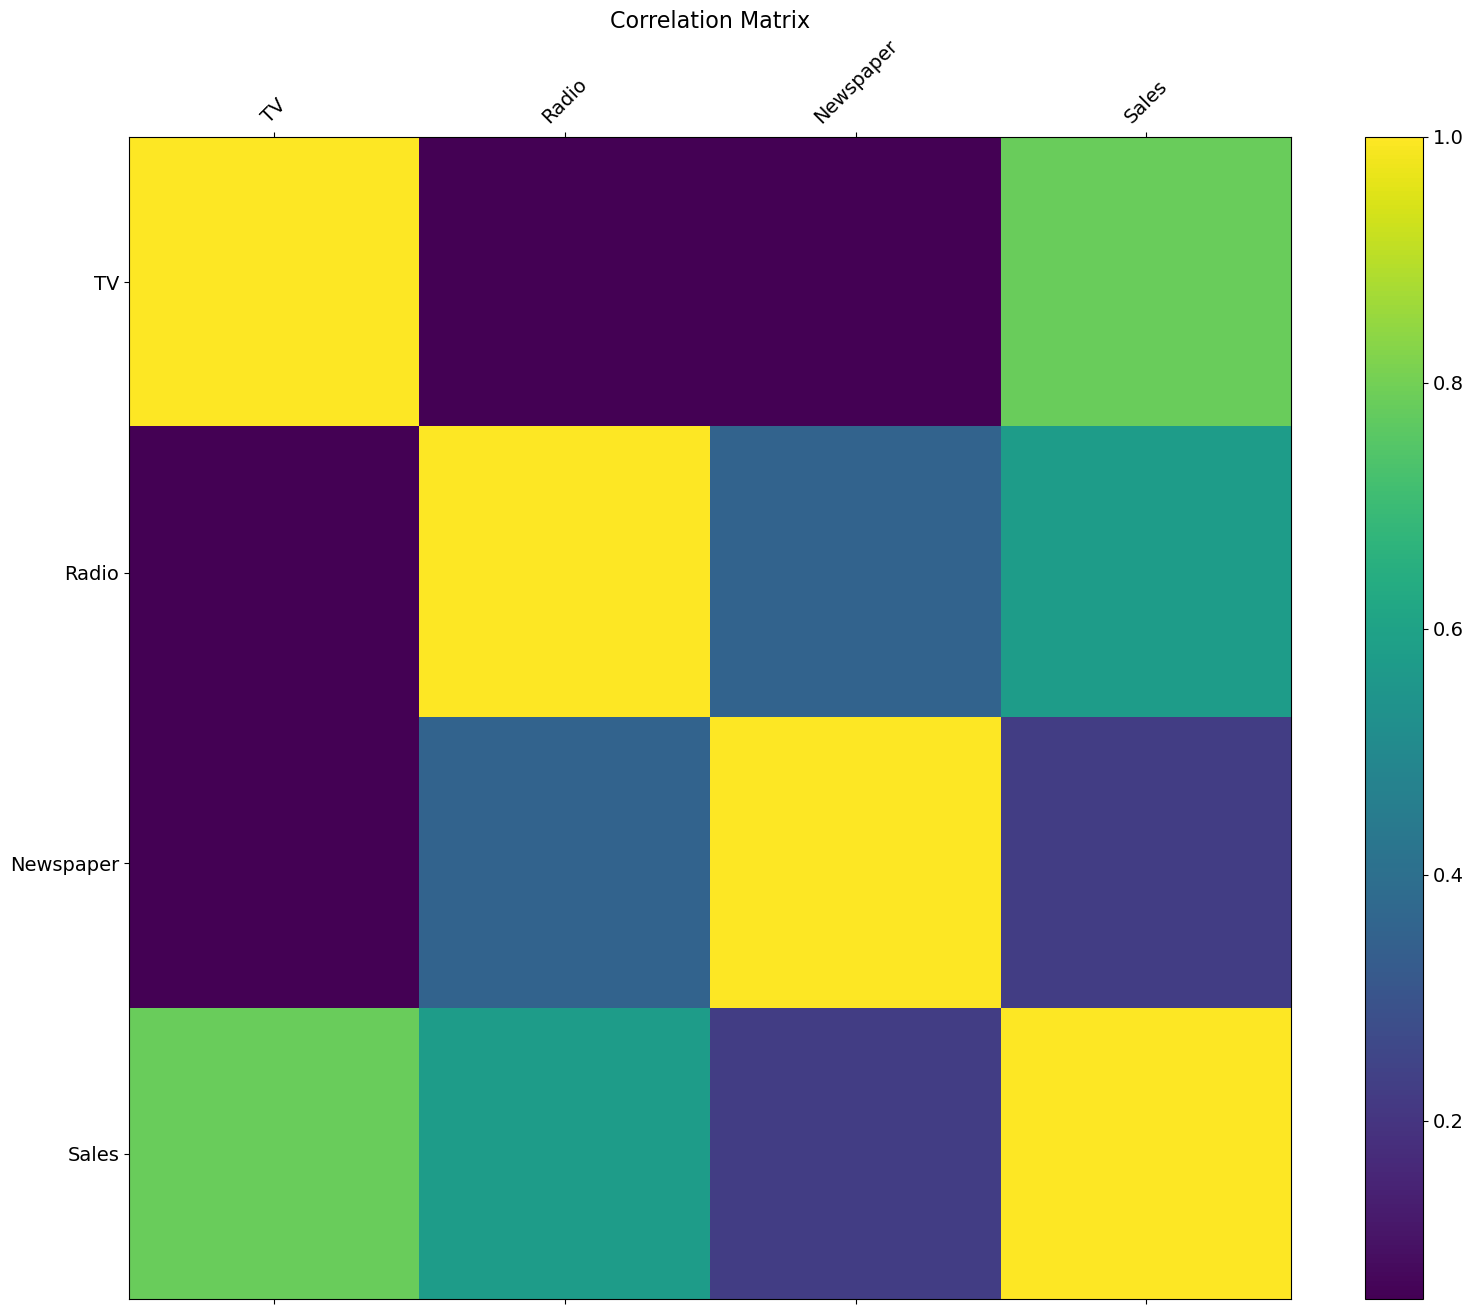

In [60]:
f = plt.figure(figsize=(19, 15))
plt.matshow(Advertising.corr(), fignum=f.number)
plt.xticks(range(Advertising.select_dtypes(['number']).shape[1]), Advertising.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(Advertising.select_dtypes(['number']).shape[1]), Advertising.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

print(Advertising.corr())